In [8]:
from collections import defaultdict
import csv

def parse_results(directory, filename):
    results = defaultdict(list)
    with open("/home/stephanie/ray-fork/results/{}/{}".format(directory, filename), 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            lease = float(row['lease'])
            num_reconstructions = float(row['num_reconstructions'])
            num_submitted = float(row['num_submitted'])
            results[lease].append(num_reconstructions / num_submitted)
    return results

In [13]:
def parse_failure_results(directory, filename):
    results = defaultdict(list)
    with open("/home/stephanie/ray-fork/results/{}/{}".format(directory, filename), 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            lease = float(row['lease'])
            results[lease].append(float(row['duration']))
    return results

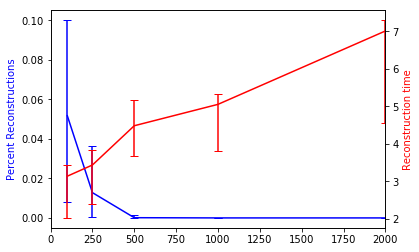

In [26]:
import matplotlib.pyplot as plt
import numpy as np

DIRECTORY = "results-lease"
results = parse_results(DIRECTORY, "lease-reconstructions-Fri Aug 31 13:52:19 PDT 2018.csv")
lease_times = sorted(results.keys())
means = []
yerr_low = []
yerr_high = []
for tick in lease_times:
    mean = np.mean(results[tick])
    means.append(mean)
    yerr_low.append(
        mean - np.quantile(results[tick], 0.025)
    )
    yerr_high.append(
        np.quantile(results[tick], 0.975) - mean
    )
plt.errorbar(lease_times, means, yerr=[yerr_low, yerr_high], color='b', capsize=4)
plt.ylabel("Percent Reconstructions", color='b')

ax = plt.twinx()
results = parse_failure_results(DIRECTORY, "lease-failure-Fri Aug 31 13:52:29 PDT 2018.csv")
lease_times = sorted(results.keys())
means = []
yerr_low = []
yerr_high = []
for tick in lease_times:
    mean = np.mean(results[tick])
    means.append(mean)
    yerr_low.append(
        mean - np.quantile(results[tick], 0.025)
    )
    yerr_high.append(
        np.quantile(results[tick], 0.975) - mean
    )
ax.errorbar(lease_times, means, yerr=[yerr_low, yerr_high], color='r', capsize=4)
ax.set_ylabel('Reconstruction time', color='r')

plt.xlabel("Task lease period(ms)")
# plt.ylim(0, 100)
plt.xlim(0, 2000)

# plt.show()
plt.savefig("/home/stephanie/ray-fork/results/{}/lease-reconstructions.pdf".format(DIRECTORY))